In [1]:
#단어집합 5,000개, 10,000개, 15,000개

In [4]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)
(x_train_15000, y_train_15000), (x_test_15000, y_test_15000) = reuters.load_data(num_words=15000, test_split=0.2)

In [4]:
# 샘플 개수 확인
print('훈련 샘플의 수: {}'.format(len(x_train_5000)))
print('테스트 샘플의 수: {}'.format(len(x_test_5000)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [7]:
# 클래스 개수 확인

num_classes = len(set(y_train_5000))
num_classes

NameError: name 'y_train_5000' is not defined

In [6]:
print('단어집합 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_5000)))
print('단어집합 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_5000))/len(x_train_5000)))

5,000개 단어집합 뉴스의 최대 길이 :2376
5,000개 단어집합 뉴스의 평균 길이 :145.5398574927633
10,000개 단어집합 뉴스의 최대 길이 :2376
10,000개 단어집합 뉴스의 평균 길이 :145.5398574927633
15,000개 단어집합 뉴스의 최대 길이 :2376
15,000개 단어집합 뉴스의 평균 길이 :145.5398574927633


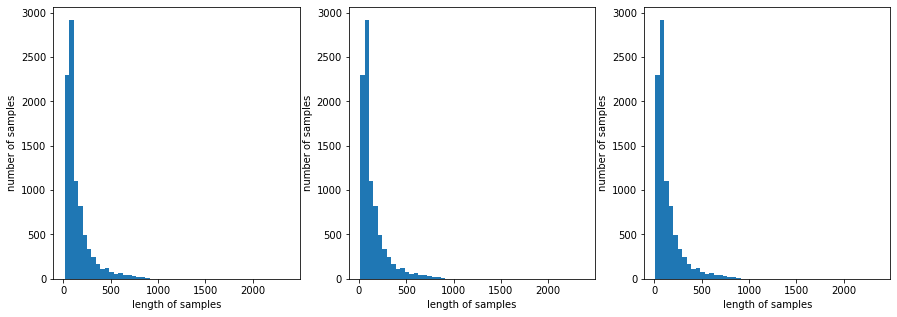

In [7]:
# 뉴스 문장 길이 확인

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist([len(s) for s in x_train_5000], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.subplot(1, 3, 2)
plt.hist([len(s) for s in x_train_10000], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.subplot(1, 3, 3)
plt.hist([len(s) for s in x_train_15000], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.show()

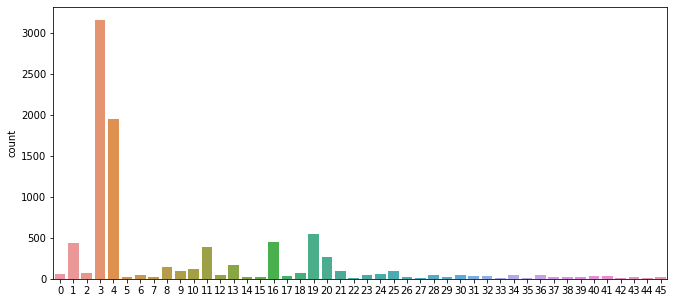

In [8]:
# 클래스 분포 확인

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_10000)
plt.show()

In [9]:
# 각 클래스별 개수 확인

np.unique(y_train_10000, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18]))

In [10]:
# 정수 시퀀스를 텍스트로 변환한 단어사전 생성
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [11]:
len(word_index.items())

30979

In [12]:
word_index['it']

13

In [13]:
# 시퀀스-단어 사전 생성(특이토큰 3개는 인덱스에서 제외)
index_to_word = { index+3 : word for word, index in word_index.items() }

In [14]:
# 특이토큰에 인덱스 할당
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [15]:
print(index_to_word[0])
print(index_to_word[1])
print(index_to_word[2])

<pad>
<sos>
<unk>


In [16]:
# 1번 기사를 단어사전 5,000개를 활용하여 텍스트로 복원
print(' '.join([index_to_word[index] for index in x_train_5000[1]]))

<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3


In [17]:
# 1번 기사를 단어사전 10,000개를 활용하여 텍스트로 복원
print(' '.join([index_to_word[index] for index in x_train_10000[1]]))

<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3


In [18]:
# 1번 기사를 단어사전 15,000개를 활용하여 텍스트로 복원
print(' '.join([index_to_word[index] for index in x_train_15000[1]]))

<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3


In [19]:
# br, belgo 등의 단어가 unk 처리됨

In [20]:
print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]]))

the transaction is expected to be completed


In [21]:
# 5,000개 단어사전을 사용하여 학습데이터 및 테스트데이터 텍스트 변환

train_decoded = []
for i in range(len(x_train_5000)):
    t = ' '.join([index_to_word[index] for index in x_train_5000[i]])
    train_decoded.append(t)

x_train_5000 = train_decoded

test_decoded = []
for i in range(len(x_test_5000)):
    t = ' '.join([index_to_word[index] for index in x_test_5000[i]])
    test_decoded.append(t)

x_test_5000 = test_decoded

In [22]:
# 10,000개 단어사전을 사용하여 학습데이터 및 테스트데이터 텍스트 변환

train_decoded = []
for i in range(len(x_train_10000)):
    t = ' '.join([index_to_word[index] for index in x_train_10000[i]])
    train_decoded.append(t)

x_train_10000 = train_decoded

test_decoded = []
for i in range(len(x_test_10000)):
    t = ' '.join([index_to_word[index] for index in x_test_10000[i]])
    test_decoded.append(t)

x_test_10000 = test_decoded

In [23]:
# 15,000개 단어사전을 사용하여 학습데이터 및 테스트데이터 텍스트 변환

train_decoded = []
for i in range(len(x_train_15000)):
    t = ' '.join([index_to_word[index] for index in x_train_15000[i]])
    train_decoded.append(t)

x_train_15000 = train_decoded

test_decoded = []
for i in range(len(x_test_15000)):
    t = ' '.join([index_to_word[index] for index in x_test_15000[i]])
    test_decoded.append(t)

x_test_15000 = test_decoded

In [24]:
print(x_train_10000[:5])
print('\n')
print(x_test_10000[:5])

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3', '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3', '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
# 학습데이터 DTM 생성

dtmvector_5000 = CountVectorizer()
dtmvector_10000 = CountVectorizer()
dtmvector_15000 = CountVectorizer()

x_train_5000_dtm = dtmvector_5000.fit_transform(x_train_5000)
x_train_10000_dtm = dtmvector_10000.fit_transform(x_train_10000)
x_train_15000_dtm = dtmvector_15000.fit_transform(x_train_15000)

print(x_train_5000_dtm.shape)
print(x_train_10000_dtm.shape)
print(x_train_15000_dtm.shape)

(8982, 4867)
(8982, 9670)
(8982, 14227)


In [35]:
# 학습데이터 TF-IDF 생성

tfidf_transformer_5000 = TfidfTransformer()
tfidf_transformer_10000 = TfidfTransformer()
tfidf_transformer_15000 = TfidfTransformer()

x_train_5000_tfidfv = tfidf_transformer_5000.fit_transform(x_train_5000_dtm)
x_train_10000_tfidfv = tfidf_transformer_10000.fit_transform(x_train_10000_dtm)
x_train_15000_tfidfv = tfidf_transformer_15000.fit_transform(x_train_15000_dtm)

print(x_train_5000_tfidfv.shape)
print(x_train_10000_tfidfv.shape)
print(x_train_15000_tfidfv.shape)

(8982, 4867)
(8982, 9670)
(8982, 14227)


In [36]:
# 테스트데이터 DTM 생성

x_test_5000_dtm = dtmvector_5000.transform(x_test_5000)
x_test_10000_dtm = dtmvector_10000.transform(x_test_10000)
x_test_15000_dtm = dtmvector_15000.transform(x_test_15000)

print(x_test_5000_dtm.shape)
print(x_test_10000_dtm.shape)
print(x_test_15000_dtm.shape)

(2246, 4867)
(2246, 9670)
(2246, 14227)


In [37]:
# 테스트데이터 TF-IDF 생성

x_test_5000_tfidfv = tfidf_transformer_5000.transform(x_test_5000_dtm)
x_test_10000_tfidfv = tfidf_transformer_10000.transform(x_test_10000_dtm)
x_test_15000_tfidfv = tfidf_transformer_15000.transform(x_test_15000_dtm)

print(x_test_5000_tfidfv.shape)
print(x_test_10000_tfidfv.shape)
print(x_test_15000_tfidfv.shape)

(2246, 4867)
(2246, 9670)
(2246, 14227)


In [38]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [48]:
def model_train_evaluate(model, x_train, y_train, x_test, y_test, model_name="Model"):

    # 모델 학습
    model.fit(x_train, y_train)
    
    # 예측
    predicted = model.predict(x_test)
    
    # 평가
    report = classification_report(y_test, predicted, output_dict=True)
    
    # 결과 출력
    print(f"\n=== {model_name} 결과 ===")
    print(f"정확도 (Accuracy): {report['accuracy']:.4f}")
    print(f"단순평균 F1 점수 (Macro Avg F1): {report['macro avg']['f1-score']:.4f}")
    print(f"가중평균 F1 점수 (Weighted Avg F1): {report['weighted avg']['f1-score']:.4f}")

In [46]:
# 각 모델 정의

# 첫번째 모델 컴플리먼트 나이브 베이즈
cnb_5000 = ComplementNB()
cnb_10000 = ComplementNB()
cnb_15000 = ComplementNB()

# 두번째 로지스틱 회귀
lr_5000 = LogisticRegression(C=1000, penalty='l2', max_iter=3000)
lr_10000 = LogisticRegression(C=1000, penalty='l2', max_iter=3000)
lr_15000 = LogisticRegression(C=1000, penalty='l2', max_iter=3000)

# 세번째 서포트 벡터 머신
lsvc_5000 = LinearSVC(C=1000, penalty='l2', max_iter=3000, dual=False, probability=True)
lsvc_10000 = LinearSVC(C=1000, penalty='l2', max_iter=3000, dual=False, probability=True)
lsvc_15000 = LinearSVC(C=1000, penalty='l2', max_iter=3000, dual=False, probability=True)

# 네번째 랜덤 포레스트
rf_5000 = RandomForestClassifier(n_estimators=5, random_state=42)
rf_10000 = RandomForestClassifier(n_estimators=5, random_state=42)
rf_15000 = RandomForestClassifier(n_estimators=5, random_state=42)

# 다섯번째 그래디언트 부스팅
gb_5000 = GradientBoostingClassifier(random_state=42)
gb_10000 = GradientBoostingClassifier(random_state=42)
gb_15000 = GradientBoostingClassifier(random_state=42)

In [50]:
# 모델 학습 및 평가

model_train_evaluate(cnb_5000, x_train_5000_tfidfv, y_train_5000, x_test_5000_tfidfv, y_test_5000, "ComplementNB (5000 단어)")
model_train_evaluate(cnb_10000, x_train_10000_tfidfv, y_train_10000, x_test_10000_tfidfv, y_test_10000, "ComplementNB (10000 단어)")
model_train_evaluate(cnb_15000, x_train_15000_tfidfv, y_train_15000, x_test_15000_tfidfv, y_test_15000, "ComplementNB (15000 단어)")

model_train_evaluate(lr_5000, x_train_5000_tfidfv, y_train_5000, x_test_5000_tfidfv, y_test_5000, "LogisticRegression (5000 단어)")
model_train_evaluate(lr_10000, x_train_10000_tfidfv, y_train_10000, x_test_10000_tfidfv, y_test_10000, "LogisticRegression (10000 단어)")
model_train_evaluate(lr_15000, x_train_15000_tfidfv, y_train_15000, x_test_15000_tfidfv, y_test_15000, "LogisticRegression (15000 단어)")

model_train_evaluate(lsvc_5000, x_train_5000_tfidfv, y_train_5000, x_test_5000_tfidfv, y_test_5000, "LinearSVC (5000 단어)")
model_train_evaluate(lsvc_10000, x_train_10000_tfidfv, y_train_10000, x_test_10000_tfidfv, y_test_10000, "LinearSVC (10000 단어)")
model_train_evaluate(lsvc_15000, x_train_15000_tfidfv, y_train_15000, x_test_15000_tfidfv, y_test_15000, "LinearSVC (15000 단어)")

model_train_evaluate(rf_5000, x_train_5000_tfidfv, y_train_5000, x_test_5000_tfidfv, y_test_5000, "RandomForestClassifier (5000 단어)")
model_train_evaluate(rf_10000, x_train_10000_tfidfv, y_train_10000, x_test_10000_tfidfv, y_test_10000, "RandomForestClassifier (10000 단어)")
model_train_evaluate(rf_15000, x_train_15000_tfidfv, y_train_15000, x_test_15000_tfidfv, y_test_15000, "RandomForestClassifier (15000 단어)")

model_train_evaluate(gb_5000, x_train_5000_tfidfv, y_train_5000, x_test_5000_tfidfv, y_test_5000, "GradientBoostingClassifier (5000 단어)")
model_train_evaluate(gb_10000, x_train_10000_tfidfv, y_train_10000, x_test_10000_tfidfv, y_test_10000, "GradientBoostingClassifier (10000 단어)")
model_train_evaluate(gb_15000, x_train_15000_tfidfv, y_train_15000, x_test_15000_tfidfv, y_test_15000, "GradientBoostingClassifier (15000 단어)")

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classificat


=== ComplementNB (5000 단어) 결과 ===
정확도 (Accuracy): 0.7707
단순평균 F1 점수 (Macro Avg F1): 0.4820
가중평균 F1 점수 (Weighted Avg F1): 0.7459

=== ComplementNB (10000 단어) 결과 ===
정확도 (Accuracy): 0.7707
단순평균 F1 점수 (Macro Avg F1): 0.4784
가중평균 F1 점수 (Weighted Avg F1): 0.7457

=== ComplementNB (15000 단어) 결과 ===
정확도 (Accuracy): 0.7720
단순평균 F1 점수 (Macro Avg F1): 0.4668
가중평균 F1 점수 (Weighted Avg F1): 0.7448


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== LogisticRegression (5000 단어) 결과 ===
정확도 (Accuracy): 0.8068
단순평균 F1 점수 (Macro Avg F1): 0.6426
가중평균 F1 점수 (Weighted Avg F1): 0.8009


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== LogisticRegression (10000 단어) 결과 ===
정확도 (Accuracy): 0.8126
단순평균 F1 점수 (Macro Avg F1): 0.6658
가중평균 F1 점수 (Weighted Avg F1): 0.8069


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== LogisticRegression (15000 단어) 결과 ===
정확도 (Accuracy): 0.8139
단순평균 F1 점수 (Macro Avg F1): 0.6632
가중평균 F1 점수 (Weighted Avg F1): 0.8082


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== LinearSVC (5000 단어) 결과 ===
정확도 (Accuracy): 0.7934
단순평균 F1 점수 (Macro Avg F1): 0.6359
가중평균 F1 점수 (Weighted Avg F1): 0.7892

=== LinearSVC (10000 단어) 결과 ===
정확도 (Accuracy): 0.8037
단순평균 F1 점수 (Macro Avg F1): 0.6569
가중평균 F1 점수 (Weighted Avg F1): 0.7992

=== LinearSVC (15000 단어) 결과 ===
정확도 (Accuracy): 0.8041
단순평균 F1 점수 (Macro Avg F1): 0.6744
가중평균 F1 점수 (Weighted Avg F1): 0.8000


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== RandomForestClassifier (5000 단어) 결과 ===
정확도 (Accuracy): 0.6932
단순평균 F1 점수 (Macro Avg F1): 0.3098
가중평균 F1 점수 (Weighted Avg F1): 0.6663


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== RandomForestClassifier (10000 단어) 결과 ===
정확도 (Accuracy): 0.6776
단순평균 F1 점수 (Macro Avg F1): 0.2913
가중평균 F1 점수 (Weighted Avg F1): 0.6448


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== RandomForestClassifier (15000 단어) 결과 ===
정확도 (Accuracy): 0.6741
단순평균 F1 점수 (Macro Avg F1): 0.3146
가중평균 F1 점수 (Weighted Avg F1): 0.6479

=== GradientBoostingClassifier (5000 단어) 결과 ===
정확도 (Accuracy): 0.7685
단순평균 F1 점수 (Macro Avg F1): 0.5875
가중평균 F1 점수 (Weighted Avg F1): 0.7675

=== GradientBoostingClassifier (10000 단어) 결과 ===
정확도 (Accuracy): 0.7707
단순평균 F1 점수 (Macro Avg F1): 0.5758
가중평균 F1 점수 (Weighted Avg F1): 0.7665

=== GradientBoostingClassifier (15000 단어) 결과 ===
정확도 (Accuracy): 0.7663
단순평균 F1 점수 (Macro Avg F1): 0.5691
가중평균 F1 점수 (Weighted Avg F1): 0.7633


In [59]:
# 위 5개 모델 중 SVC를 제외한 4개 모델로 보팅 모델 구성

voting_5000 =  VotingClassifier(estimators=[('cnb_5000', cnb_5000),
                                            ('lr_5000', lr_5000),
                                            
                                            ('rf_5000', rf_5000),
                                            ('gb_5000', gb_5000)],
                                voting='soft')

voting_10000 =  VotingClassifier(estimators=[('cnb_10000', cnb_10000),
                                            ('lr_10000', lr_10000),
                                            
                                            ('rf_10000', rf_10000),
                                            ('gb_10000', gb_10000)],
                                voting='soft')

voting_15000 =  VotingClassifier(estimators=[('cnb_15000', cnb_15000),
                                            ('lr_15000', lr_15000),
                                            
                                            ('rf_15000', rf_15000),
                                            ('gb_15000', gb_15000)],
                                voting='soft')

In [55]:
from sklearn.svm import SVC

In [58]:
# 세번째 서포트 벡터 머신
svc_5000 = SVC(C=1000, max_iter=3000, probability=True)
svc_10000 = SVC(C=1000, max_iter=3000, probability=True)
svc_15000 = SVC(C=1000, max_iter=3000, probability=True)

model_train_evaluate(svc_5000, x_train_5000_tfidfv, y_train_5000, x_test_5000_tfidfv, y_test_5000, "SVC (5000 단어)")
model_train_evaluate(svc_10000, x_train_10000_tfidfv, y_train_10000, x_test_10000_tfidfv, y_test_10000, "SVC (10000 단어)")
model_train_evaluate(svc_15000, x_train_15000_tfidfv, y_train_15000, x_test_15000_tfidfv, y_test_15000, "SVC (15000 단어)")

KeyboardInterrupt: 

In [ ]:
# 보팅모델 평가

model_train_evaluate(voting_5000, x_train_5000_tfidfv, y_train_5000, x_test_5000_tfidfv, y_test_5000, "VotingClassifier (5000 단어)")
model_train_evaluate(voting_10000, x_train_10000_tfidfv, y_train_10000, x_test_10000_tfidfv, y_test_10000, "VotingClassifier (10000 단어)")
model_train_evaluate(voting_15000, x_train_15000_tfidfv, y_train_15000, x_test_15000_tfidfv, y_test_15000, "VotingClassifier (15000 단어)")

#### 결과

##### 컴플리먼트 나이브베이즈
- 5000 단어 :  정확도 0.7707, 단순평균 F1 점수 0.4820, 가중평균 F1 점수 0.7459
- 10000 단어 : 정확도 0.7707, 단순평균 F1 점수 0.4784, 가중평균 F1 점수 0.7457
- 15000 단어 : 정확도 0.7720, 단순평균 F1 점수 0.4668, 가중평균 F1 점수 0.7448

##### 로지스틱 회귀
- 5000 단어 :  정확도 0.8068, 단순평균 F1 점수 0.6426, 가중평균 F1 점수 0.8009
- 10000 단어 : 정확도 0.8126, 단순평균 F1 점수 0.6658, 가중평균 F1 점수 0.8069
- 15000 단어 : 정확도 0.8139, 단순평균 F1 점수 0.6632, 가중평균 F1 점수 0.8082

##### 선형 서포트벡터머신
- 5000 단어 :  정확도 0.7934, 단순평균 F1 점수 0.6359, 가중평균 F1 점수 0.7892
- 10000 단어 : 정확도 0.8037, 단순평균 F1 점수 0.6569, 가중평균 F1 점수 0.7992
- 15000 단어 : 정확도 0.8041, 단순평균 F1 점수 0.6744, 가중평균 F1 점수 0.8000

##### 서포트벡터머신 ?

##### 랜덤 포레스트
- 5000 단어 :  정확도 0.6932, 단순평균 F1 점수 0.3098, 가중평균 F1 점수 0.6663
- 10000 단어 : 정확도 0.6776, 단순평균 F1 점수 0.2913, 가중평균 F1 점수 0.6448
- 15000 단어 : 정확도 0.6741, 단순평균 F1 점수 0.3146, 가중평균 F1 점수 0.6479

##### 그래디언트 부스팅
- 5000 단어 :  정확도 0.7685, 단순평균 F1 점수 0.5875, 가중평균 F1 점수 0.7675
- 10000 단어 : 정확도 0.7707, 단순평균 F1 점수 0.5758, 가중평균 F1 점수 0.7665
- 15000 단어 : 정확도 0.7663, 단순평균 F1 점수 0.5691, 가중평균 F1 점수 0.7633


#### 딥러닝 CNN 모델로 로이터 뉴스 클래스 분류

In [1]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Dense, MaxPool1D, Flatten, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# 문장 최대 길이 300
max_len = 300

In [5]:
(encoded_x_train_5000, encoded_y_train_5000), (encoded_x_test_5000, encoded_y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)
(encoded_x_train_10000, encoded_y_train_10000), (encoded_x_test_10000, encoded_y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)
(encoded_x_train_15000, encoded_y_train_15000), (encoded_x_test_15000, encoded_y_test_15000) = reuters.load_data(num_words=15000, test_split=0.2)

# 데이터 전처리
encoded_x_train_5000 = pad_sequences(encoded_x_train_5000, maxlen=max_len, padding='post')
encoded_x_train_10000 = pad_sequences(encoded_x_train_10000, maxlen=max_len, padding='post')
encoded_x_train_15000 = pad_sequences(encoded_x_train_15000, maxlen=max_len, padding='post')

encoded_x_test_5000 = pad_sequences(encoded_x_test_5000, maxlen=max_len, padding='post')
encoded_x_test_10000 = pad_sequences(encoded_x_test_10000, maxlen=max_len, padding='post')
encoded_x_test_15000 = pad_sequences(encoded_x_test_15000, maxlen=max_len, padding='post')

In [8]:
# 레이블 원-핫 인코딩
y_train_5000 = to_categorical(encoded_y_train_5000, 46)
y_test_5000 = to_categorical(encoded_y_test_5000, 46)

y_train_10000 = to_categorical(encoded_y_train_10000, 46)
y_test_10000 = to_categorical(encoded_y_test_10000, 46)

y_train_15000 = to_categorical(encoded_y_train_15000, 46)
y_test_15000 = to_categorical(encoded_y_test_15000, 46)

In [9]:
from tensorflow.keras import backend as K

In [10]:
#  F1 스코어 정의
def f1_score_macro(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2 * p * r / (p + r + K.epsilon())
    return K.mean(f1)  # 평균 F1 스코어

def f1_score_weighted(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2 * p * r / (p + r + K.epsilon())
    weights = K.sum(y_true, axis=0) / K.sum(y_true)
    return K.sum(f1 * weights)  # 가중 F1 스코어

In [12]:
# 모델 생성
model_cnn_5000 = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),        # 1D 합성곱층 (필터 수, 커널 크기)
    GlobalMaxPooling1D(),                     # 최대 풀링
    Dense(128, activation='relu'),
    Dropout(0.3),                             # 과적합 방지
    Dense(46, activation='softmax')  # 다중 클래스 분류
])
model_cnn_5000.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', f1_score_macro, f1_score_weighted])

model_cnn_10000 = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),        # 1D 합성곱층 (필터 수, 커널 크기)
    GlobalMaxPooling1D(),                     # 최대 풀링
    Dense(128, activation='relu'),
    Dropout(0.3),                             # 과적합 방지
    Dense(46, activation='softmax')  # 다중 클래스 분류
])
model_cnn_10000.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', f1_score_macro, f1_score_weighted])

model_cnn_15000 = Sequential([
    Embedding(input_dim=15000, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),        # 1D 합성곱층 (필터 수, 커널 크기)
    GlobalMaxPooling1D(),                     # 최대 풀링
    Dense(128, activation='relu'),
    Dropout(0.3),                             # 과적합 방지
    Dense(46, activation='softmax')  # 다중 클래스 분류
])
model_cnn_15000.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score_macro, f1_score_weighted])

In [13]:
# 조기종료 생성

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [14]:
# 모델 학습
history_5000 = model_cnn_5000.fit(encoded_x_train_5000, y_train_5000,
                    epochs=10,
                    batch_size=64,
                    validation_data=(encoded_x_test_5000, y_test_5000),
                    callbacks = [early_stopping])

history_10000 = model_cnn_10000.fit(encoded_x_train_10000, y_train_10000,
                    epochs=10,
                    batch_size=64,
                    validation_data=(encoded_x_test_10000, y_test_10000),
                    callbacks = [early_stopping])

history_15000 = model_cnn_15000.fit(encoded_x_train_15000, y_train_15000,
                    epochs=10,
                    batch_size=64,
                    validation_data=(encoded_x_test_15000, y_test_15000),
                    callbacks = [early_stopping])

Epoch 1/10
141/141 [==============================] - 5s 10ms/step - loss: 2.1324 - accuracy: 0.4905 - f1_score_macro: 0.0257 - f1_score_weighted: 0.3483 - val_loss: 1.5720 - val_accuracy: 0.6447 - val_f1_score_macro: 0.0478 - val_f1_score_weighted: 0.5329
Epoch 2/10
141/141 [==============================] - 1s 7ms/step - loss: 1.3451 - accuracy: 0.6878 - f1_score_macro: 0.0765 - f1_score_weighted: 0.6054 - val_loss: 1.2462 - val_accuracy: 0.6955 - val_f1_score_macro: 0.0932 - val_f1_score_weighted: 0.6521
Epoch 3/10
141/141 [==============================] - 1s 7ms/step - loss: 1.0368 - accuracy: 0.7526 - f1_score_macro: 0.1107 - f1_score_weighted: 0.6909 - val_loss: 1.0405 - val_accuracy: 0.7551 - val_f1_score_macro: 0.1249 - val_f1_score_weighted: 0.6940
Epoch 4/10
141/141 [==============================] - 1s 7ms/step - loss: 0.7871 - accuracy: 0.8106 - f1_score_macro: 0.1547 - f1_score_weighted: 0.7539 - val_loss: 0.9446 - val_accuracy: 0.7801 - val_f1_score_macro: 0.1524 - val_f

In [133]:
encoded_x_test_5000 = encoded_x_test_5000.astype('float32')
encoded_x_test_10000 = encoded_x_test_10000.astype('float32')
encoded_x_test_15000 = encoded_x_test_15000.astype('float32')

In [134]:
# 에러 발생지점
# 5,000개 단어로 학습시킨 결과
y_pred_5000 = model_cnn_5000.predict(encoded_x_test_5000)
y_pred_classes_5000 = np.argmax(y_pred_5000, axis=1)
y_test_classes_5000 = np.argmax(y_test_5000, axis=1)

accuracy_5000 = accuracy_score(y_test_classes_5000, y_pred_classes_5000)
weighted_f1_5000 = f1_score_weighted(y_test_classes_5000, y_pred_classes_5000)
macro_f1_5000 = f1_score_macro(y_test_classes_5000, y_pred_classes_5000)

print(f'Accuracy: {accuracy_5000:.4f}')
print(f'Weighted F1 Score: {weighted_f1_5000:.4f}')
print(f'Macro F1 Score: {macro_f1_5000:.4f}')

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:Mul]

In [115]:
# 5,000개 단어로 학습시킨 결과

y_pred_5000 = model_cnn_5000.predict(encoded_x_test_5000)
y_pred_classes_5000 = np.argmax(y_pred_5000, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy_5000 = accuracy_score(y_test_classes, y_pred_classes_5000)
weighted_f1_5000 = f1_score_weighted(y_test_classes, y_pred_classes_5000)
macro_f1_5000 = f1_score_macro(y_test_classes, y_pred_classes_5000)

print(f'Accuracy: {accuracy_5000:.4f}')
print(f'Weighted F1 Score: {weighted_f1_5000:.4f}')
print(f'Macro F1 Score: {macro_f1_5000:.4f}')

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:Mul]

In [ ]:
# 10,000개 단어로 학습시킨 결과

y_pred_10000 = model_cnn_10000.predict(encoded_x_test_10000)
y_pred_classes_10000 = np.argmax(y_pred_10000, axis=1)

accuracy_10000 = accuracy_score(y_test_classes, y_pred_classes_10000)
weighted_f1_10000 = f1_score(y_test_classes, y_pred_classes_10000, average='weighted')
macro_f1_10000 = f1_score(y_test_classes, y_pred_classes_10000, average='macro')

print(f'Accuracy: {accuracy_10000:.4f}')
print(f'Weighted F1 Score: {weighted_f1_10000:.4f}')
print(f'Macro F1 Score: {macro_f1_10000:.4f}')

In [ ]:
# 15,000개 단어로 학습시킨 결과

y_pred_15000 = model_cnn_15000.predict(encoded_x_test_15000)
y_pred_classes_10000 = np.argmax(y_pred_15000, axis=1)

accuracy_15000 = accuracy_score(y_test_classes, y_pred_classes_15000)
weighted_f1_15000 = f1_score(y_test_classes, y_pred_classes_15000, average='weighted')
macro_f1_15000 = f1_score(y_test_classes, y_pred_classes_15000, average='macro')

print(f'Accuracy: {accuracy_15000:.4f}')
print(f'Weighted F1 Score: {weighted_f1_15000:.4f}')
print(f'Macro F1 Score: {macro_f1_15000:.4f}')

In [ ]:
# 평가지표 시각화

plt.figure(figsize=(15, 10))

plt.subplot(1,3,1)
plt.bar(['Accuracy', 'Macro F1 Score', 'Weighted F1 Score'],
        [accuracy_5000, weighted_f1_5000, macro_f1_5000], color=['blue', 'green', 'orange'])
plt.title('Vocab_size:5000 Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')

plt.subplot(1,3,2)
plt.bar(['Accuracy', 'Macro F1 Score', 'Weighted F1 Score'],
        [accuracy_10000, weighted_f1_10000, macro_f1_10000], color=['blue', 'green', 'orange'])
plt.title('Vocab_size:10000 Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')

plt.subplot(1,3,3)
plt.bar(['Accuracy', 'Macro F1 Score', 'Weighted F1 Score'],
        [accuracy_15000, weighted_f1_15000, macro_f1_15000], color=['blue', 'green', 'orange'])
plt.title('Vocab_size:15000 Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')